In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical


In [2]:
plt.figure(figsize=(12, 12))
path = "C:\\Users\\cl502_18\\Desktop\PlantDataset\\Apple__Apple_scab"

<Figure size 1200x1200 with 0 Axes>

C:\Users\cl502_18\AppData\Local\Temp\ipykernel_13672\24803227.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


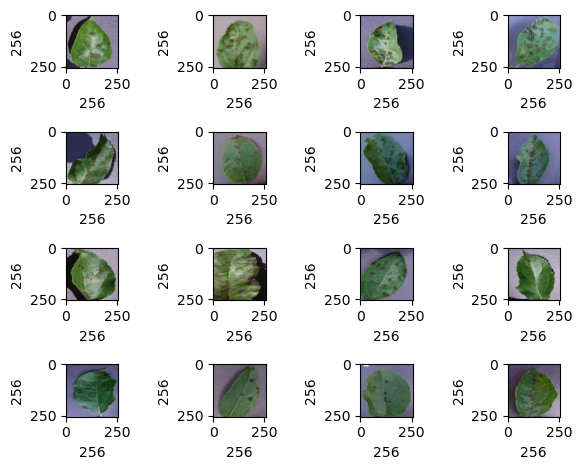

In [3]:
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)  # width of image
    plt.ylabel(rand_img.shape[0], fontsize=10)  # height of image


In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error: {e}")
        return None


In [5]:
dir = "C:\\Users\\cl502_18\\Desktop\PlantDataset"

In [6]:
image_list, label_list = [], []
all_labels = [
    'Apple__Apple_scab', 'Apple__Black_rot', 'Apple__Cedar_apple_rust', 'Apple___healthy',
    'Blueberry__healthy',
    'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight',
    'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    'Orange___Haunglongbing_(Citrus_greening)',
    'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
    'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight',
    'Raspberry___healthy',
    'Soybean___healthy',
    'Squash___Powdery_mildew',
    'Strawberry___healthy', 'Strawberry___Leaf_scorch',
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy',
    'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
]
binary_labels = list(range(len(all_labels)))

temp = -1

In [7]:
# Reading and converting images to numpy arrays
for directory in all_labels:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

In [8]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()
image_list[0].shape


(256, 256, 3)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10, stratify=label_list)
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(len(all_labels), activation="softmax"))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(2e-6), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)
epochs = 10
batch_size = 16
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
300/300 [==============================] - 78s 257ms/step - loss: 3.6375 - accuracy: 0.0267 - val_loss: 3.6354 - val_accuracy: 0.0250
Epoch 2/10
300/300 [==============================] - 78s 260ms/step - loss: 3.6353 - accuracy: 0.0233 - val_loss: 3.6351 - val_accuracy: 0.0317
Epoch 3/10
300/300 [==============================] - 78s 261ms/step - loss: 3.6344 - accuracy: 0.0283 - val_loss: 3.6338 - val_accuracy: 0.0250
Epoch 4/10
300/300 [==============================] - 78s 261ms/step - loss: 3.6332 - accuracy: 0.0321 - val_loss: 3.6330 - val_accuracy: 0.0333
Epoch 5/10
300/300 [==============================] - 78s 261ms/step - loss: 3.6319 - accuracy: 0.0294 - val_loss: 3.6319 - val_accuracy: 0.0308
Epoch 6/10
300/300 [==============================] - 79s 263ms/step - loss: 3.6303 - accuracy: 0.0300 - val_loss: 3.6308 - val_accuracy: 0.0300
Epoch 7/10
300/300 [==============================] - 79s 263ms/step - loss: 3.6287 - accuracy: 0.0306 - val_loss: 3.6290 - val_ac

Epoch 1/10
300/300 [==============================] - 2624s 9s/step - loss: 3.1733 - accuracy: 0.1779 - val_loss: 2.0080 - val_accuracy: 0.4733
Epoch 2/10
300/300 [==============================] - 2652s 9s/step - loss: 1.1589 - accuracy: 0.6746 - val_loss: 0.8807 - val_accuracy: 0.7425
Epoch 3/10
300/300 [==============================] - 2672s 9s/step - loss: 0.4767 - accuracy: 0.8606 - val_loss: 0.6992 - val_accuracy: 0.7967
Epoch 4/10
300/300 [==============================] - 2680s 9s/step - loss: 0.2355 - accuracy: 0.9346 - val_loss: 0.6218 - val_accuracy: 0.8292
Epoch 5/10
300/300 [==============================] - 2655s 9s/step - loss: 0.1177 - accuracy: 0.9712 - val_loss: 0.6102 - val_accuracy: 0.8358
Epoch 6/10
300/300 [==============================] - 2644s 9s/step - loss: 0.0538 - accuracy: 0.9917 - val_loss: 0.6111 - val_accuracy: 0.8433
Epoch 7/10
300/300 [==============================] - 2646s 9s/step - loss: 0.0246 - accuracy: 0.9983 - val_loss: 0.6229 - val_accuracy:

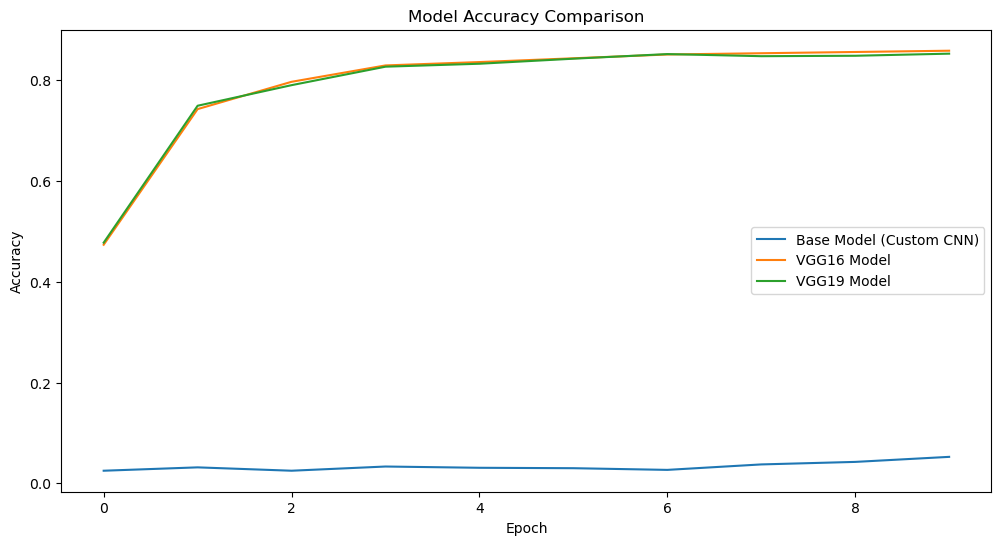

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, to_categorical
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.applications import VGG16, VGG19

# Your existing code...

# Create a function to build the VGG16 model
def build_vgg16_model(input_shape=(256, 256, 3), num_classes=len(all_labels)):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Create a function to build the VGG19 model
def build_vgg19_model(input_shape=(256, 256, 3), num_classes=len(all_labels)):
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Build and compile the models
vgg16_model = build_vgg16_model()
vgg16_model.compile(loss='categorical_crossentropy', optimizer=Adam(2e-6), metrics=['accuracy'])

vgg19_model = build_vgg19_model()
vgg19_model.compile(loss='categorical_crossentropy', optimizer=Adam(2e-6), metrics=['accuracy'])

# Train the models
vgg16_history = vgg16_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
vgg19_history = vgg19_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

# Compare the accuracies
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'], label='Base Model (Custom CNN)')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16 Model')
plt.plot(vgg19_history.history['val_accuracy'], label='VGG19 Model')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


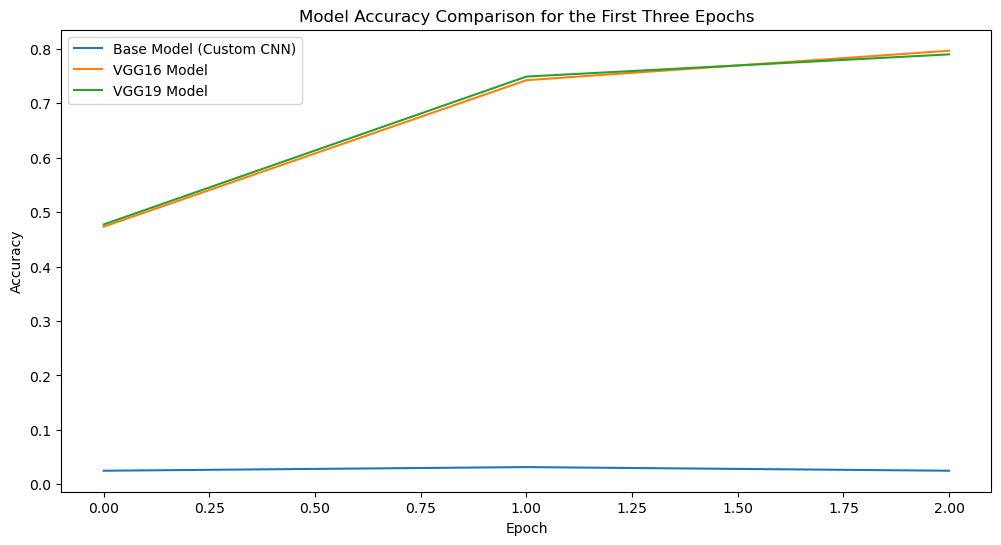

In [13]:
# Compare the accuracies for three epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_accuracy'][:3], label='Base Model (Custom CNN)')
plt.plot(vgg16_history.history['val_accuracy'][:3], label='VGG16 Model')
plt.plot(vgg19_history.history['val_accuracy'][:3], label='VGG19 Model')
plt.title('Model Accuracy Comparison for the First Three Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
